In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
import pandas as pd
import numpy as np

In [9]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()))) # add parent folder to path
from flow import Paths
from figures.seqplots import plot_rep, plot_abcd, plot_seqs
from seq import rep

Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'overlap')
ext = '.pdf'

In [ ]:
m = 'ip'
def plot_overlap(s):
    r = rep.seq_to_matrix(s, model=m, sigma=0.01)
    fig = plot_abcd(r, model=m)
    seq_name = str(s).replace(' ','').replace(']','').replace('[','')
    title = str([A[i-1] for i in s]).replace(',','').replace(']','').replace('[','').replace('\'','')
    fig.suptitle(title, fontsize=22)
    return fig, seq_name
    

A = 'ABCD'
Seq = np.array([[1, 2, 3, 4], [2, 1, 4, 3]])
for s in Seq:
    fig, seq_name = plot_overlap(s)
    plot_name = 'in-' + seq_name + ext
    file_name = os.path.join(Folder['Fig'], plot_name)
    print(file_name)
    fig.savefig(file_name)

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


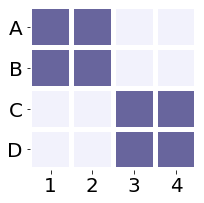

In [14]:
R = np.zeros(shape=(4,4))
for s in Seq:
    R = R + rep.seq_to_matrix(s, model=m, sigma=0.01)
print(R)
fig = plot_abcd(R/np.max(R)-0.5, model=m)
fig.savefig(os.path.join(Folder['Fig'], m + ext))

In [ ]:
Seq_out = np.array([[1, 2, 4, 3], [2, 1, 3, 4]])
for s in Seq_out:
    fig, seq_name = plot_overlap(s)
    plot_name = 'out-' + seq_name + ext
    file_name = os.path.join(Folder['Fig'], plot_name)
    print(file_name)
    fig.savefig(file_name)